# K-Nearest Neighbors (KNN)

KNN es una técnica de clasificación, la idea general de KNN es que se tienen datos con labels de la clase a la que pertenecen, una vez se quiere determinar la clase a la que pertenece una nueva muestra, se estudian los $k$ vecinos más próximos (la distancia dada por una métrica determinada), se identifica la clase a la que pertenecen esos $k$ vecinos, y por votación de mayoria, se le asigna a esa nueva muestra la clase con mas elementos dentro del grupo.

KNN tiene problemas cuando se tienen muchas variables de entrada, ya que la distancia euclidea no es la más óptima para representar las estructuras de los datos cuando se aumenta la dimensionalidad, esto se conoce como (the curse of dimensionality). Ademas si se tienen bases de datos muy grandes puede ser complejo el uso de este metodo. También la selección de la métrica de distancia es importante.

Otro problema se presenta cuando hay empate en el numero de clases de los vecinos, para evitar esto se puede utilizar un valor de $k$ que sea impar. En caso de que se mantenga el empate (que se tengan más de dos clases), entonces se puede asignar la clase de forma aleatoria. En la figura se expresa este proceso.

<img src="img/KNN_1.png" width="400">
Punto asignado a la clase roja

<img src="img/KNN_2.png" width="400">
Punto asignado a la clase verde

<img src="img/KNN_3.png" width="400">
Punto asignado a la clase verde

## Cómo se veria en Python

Ahora implementaremos este clasificador para observar como se ve las regiones de decisión.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:100, :2]  # we only take the first two features.
y = iris.target[:100]

In [11]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
classifier.fit(X, y)

KNeighborsClassifier(metric='manhattan')

/var/folders/1l/qbpsc1pj6m1g6k8f2cx12hkh0000gn/T/ipykernel_29812/2683685606.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


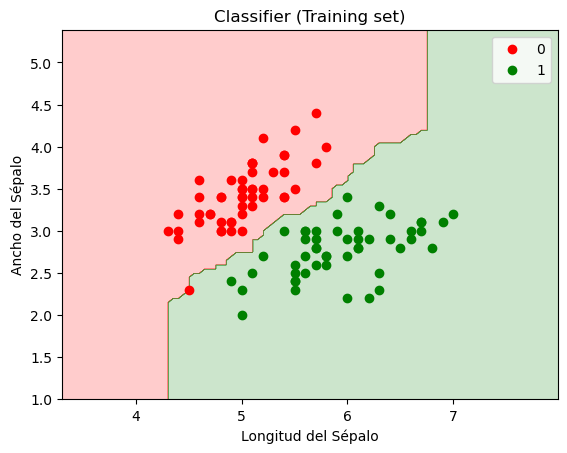

In [12]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.legend()
plt.show()

# K-Means

K-means es un metodo de clustering (agrupamiento), es decir pertenece a los metodos de aprendizaje **No Supervisado**. Cuando hablamos de aprendizaje no supervisado, nos referimos a que no tenemos un conjunto de datos de salida, o target, solamente contamos con los datos de entrada $\mathbf{x}^{(i)}$, para $i=\{1,m\}$.

<div class="alert alert-block alert-success">
<b>Pregunta:</b>  ¿Para qué pueden servir los métodos no supervisados?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b>  Los métodos de clustering permiten identificar la estructura que pueden tener los datos. Son muy utilizados en segmentación de mercado, análisis de productos (camisas), análisis de redes (sociales), segmentación de clusters de comutadores, astrofísica, entre otras áreas. Una de las ventajas de estos métodos es que nos permite encontrar las relaciones internas entre las variables, sin forzarlas a una estructura ya sea dada por un problema de regresión o un problema de clasificación. 
</div>

Es importante tener en cuenta que al no haber labels de clases, en los metodos de clustering **NO SE PUEDE HABLAR DE CLASES**, se habla de **GRUPOS** o **CLUSTERS**. A estos clusters en un paso posterior se les puede asignar un label, en ese momento el cluster se convierte en una clase, pero antes son Clusters!!!.

K-means es uno de los métodos más sencillos para hacer clustering. De forma descriptiva este método lo que hace es dividir los datos de entrada en $k$ grupos, esé número de clusters $k$ es una entrada del algoritmo y debemos seleccionarlo nosotros. Cada uno de esos clusters va a estar identificado por el valor medio de los elementos que componen al cluster, ese valor medio se denomina $\mu_{C^{(i)}}$, donde $C^{(i)}$ se refiere al cluster $i$-ésimo. En resumen, el algoritmo trabaja de la siguiente forma:

1. Dado un número de datos de entrada se inicializan los valores de $\mu_{C^{(i)}}$ de forma aleatoria. **Nota:** Otra forma es inicializar los valores de $\mu_{C^{(i)}}$ como $k$ muestras independientes pertenecientes a los datos de entrada.
2. A cada dato de entrada $\mathbf{x}^{(i)}$ se le asigna un grupo el cual esta dado por el $\mu_{C^{(i)}}$ más cercano, la cercania se mide utilizando la distancia euclidea (también se puede usar otra métrica pero eso alteraria la función de costo que vamos a ver más adelante)
3. Una vez asignados los clusters, se actualiza $\mu_{C^{(i)}}$ utilizando la media de los datos pertenencintes a ese cluster:
$$\mu_{C^{(i)}} = \frac{1}{m_{C^{(i)}}}\sum_{\mathbf{x}^{(i)}\in C^{(i)}}\mathbf{x}^{(i)},$$

con $m_{C^{(i)}}$ el número de elementos en el cluster $C^{(i)}$.

4. Se itera hasta que las medias de los clusters converjan, es decir que no cambien de forma significativa.

### Función de Costo para k-means

La función de costo para k-means esta dada por:

$$\mathbf{J}(C^{(1)}, C^{(2)}, \ldots, C^{(k)}, \mu_{C^{(1)}}, \mu_{C^{(1)}}, \ldots, \mu_{C^{(k)}}) = \frac{1}{m}\sum_{j = 1}^{m}||\mathbf{x}^{(j)}-\mu_{C^{(j)}}||^2.$$

Esta función de costo aveces se denomina la función de distorción.

<div class="alert alert-block alert-success">
<b>Pregunta:</b> ¿Cómo se minimiza esta función de costo para los clusters $C^{(i)} \in \{1,\ldots,k\}$?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b>  Cuando se asigna a cada elemento el cluster al cual pertenece el $\mu_{C^{(i)}}$ más cercano, se esta minimizando la función de costo respecto a $C^{(i)}$.
</div>

<div class="alert alert-block alert-success">
<b>Pregunta:</b> ¿Cómo se minimiza la función de costo respecto a los $\mu_{C^{(i)}}$?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b>  Mediante una optimización normal, se deriva en función de $\mu_{C^{(i)}}$ y se iguala a cero. Calcule esas derivadas y encuentre que valor de media del cluster minimiza la función de costo.
</div>

Como podemos observar, el valor de actualización de $\mu_{C^{(i)}}$ coincide con el paso tres del algoritmo. En si el proceso se puede observar como:

1. Asignar grupo en función de la distancia mas corta a la media del cluster, minimiza $\mathbf{J}$ dejando $\mu_{C^{i}}$ constante.
2. Asignar como nuevo valor de $\mu_{C^{i}}$ el valor medio de los elementos pertenecientes a ese cluster, minimiza $\mathbf{J}$ dejando los clusters constantes.

### Como escoger el valor de $k$

Existen varios criterios par aescoger el valor de $k$, entre estos se encuentra:

1. **Por conocimiento del área de trabajo**: Si un experto conoce el número de clusters, o un criterio para evaluar el número de clusters, esto se puede utilizar en el algoritmo. Ejemplo de tallas de camisas.
2. **Por criterio del Elbow (Codo)**: Aveces, para escoger el valor de $k$ se puede probar muchos valores de $k$ y hacer una gráfica de la función de costo versus $k$, muchas veces esta gráfica puede tener un comportamiento de codo (elbow), es decir un cambio abrupto (disminución) en la derivada de la función de costo respecto a $k$, se puede escoger ese punto como un valor adecuado del numero de clusters. El elbow se muestra en la figura de abajo:

<img src="img/elbow_method.png" width="400">

<div class="alert alert-block alert-success">
<b>Pregunta:</b> 
**Pregunta:** ¿La función de costo con respecto a $k$ siempre aumenta o disminuye?
</div>


<div class="alert alert-block alert-info">
<b>Solución:</b>  La función de costo siempre deberia disminuir a mayor cantidad de clusters. Sin embargo, la función de costo no es convexa, por esa razón puede tener muchos minimos locales y aveces el algortimo puede estabilizarse en un minimo local que no es óptimo, produciendo diferentes clusters cada vez que se corre el algoritmo. Para garantizar que el algortimo converja a un agrupamiento adecuado lo que se puede hacer es repetir el proceso varias veces (entre 50 a 100 veces), inicializando siempre de forma aleatoria las medias de los clusters. Al final se escoje la solución que produzca el menor costo. Si al graficar la funcion de costo en función de $k$ observamos que el costo aumenta al aumentar $k$, lo más probable es que hayamos encontrado un minimo local no óptimo para esa iteración, lo recomendable es que por cada valor de $k$ repitamos la optimización varias veces y allí si seleccionemos el menor costo como solución para ese valor especifico de número de clusters. Ejemplos de clusters localizados en minimos locales se pueden observar en las figuras de abajo.
</div>

<img src="img/Bad_Convergence.png" width="400">


### Posible problemas con k-means

1. Número de clusters no adecuado.

¿Cómo es el número de clusters en los siguientes problemas?
<img src="img/toofew1.png" width="600">
<img src="img/toomany1.png" width="600">

2. Datos en altas dimensiones (mejor disminuir la dimensionalidad usando metodos como PCA, pero se debe saber en que dirección proyectarlos.

Datos originales

<img src="img/3d.png" width="600">

¿Que sucede en las proyecciones que vemos a continuación?

<img src="img/3dproj1.png" width="600">
<img src="img/3dproj2.png" width="600">
<img src="img/3dproj3.png" width="600">

3. No se normaliza los datos (Como nos basamos en la distancia, es importante normalizar los datos)

<img src="img/Normalizar.png" width="400">

4. Clusters irregulares.

<img src="img/irregular.png" width="800">



### Tarea

Implemente el algoritmo para k-means.